In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

- CustomerID - 고객들에게 배정된 유니크한 고객 번호 입니다.
- Gender - 고객의 성별 입니다.
- Age - 고객의 나이 입니다.
- Annual Income (k$) - 고객의 연소득 입니다.
- Spending Score (1-100) - 고객의 구매행위와 구매 특성을 바탕으로 mall에서 할당한 고객의 지불 점수 입니다.

### EDA

In [2]:
# 데이터 확인
df.shape

(200, 5)

In [8]:
# 결측치 확인
print(df.info())
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# 기술통계 확인
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [12]:
# 변수간 corr 확인
df.corr()


CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000

<AxesSubplot:>

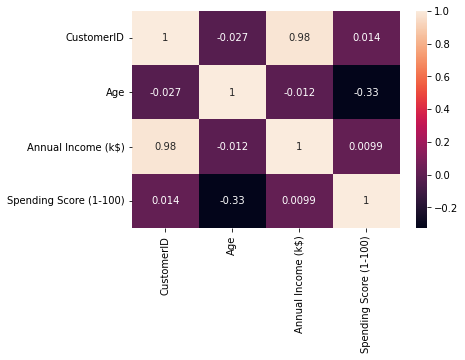

In [14]:
# 히트맵으로 확인
corr = df.corr()
sns.heatmap(corr, annot=True)

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

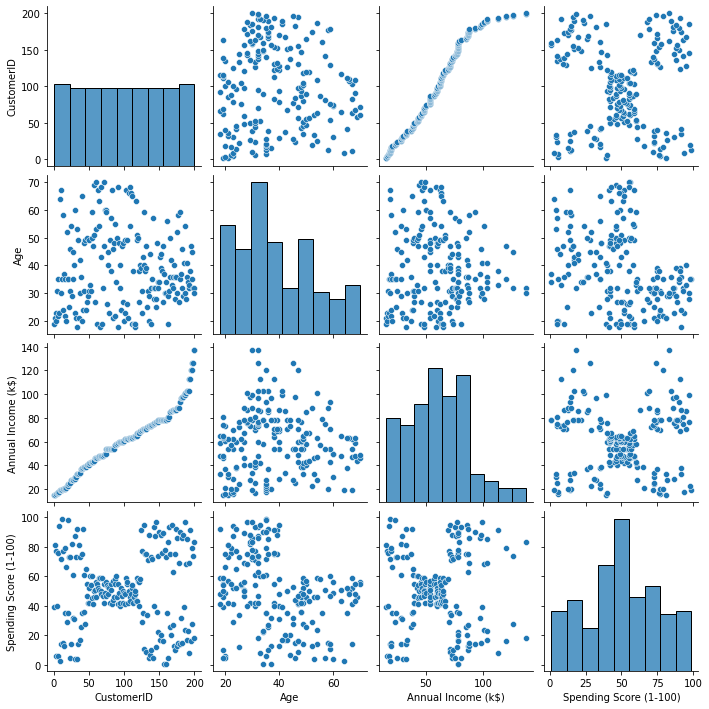

In [16]:
# pairplot으로 다시 확인
sns.pairplot(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]);

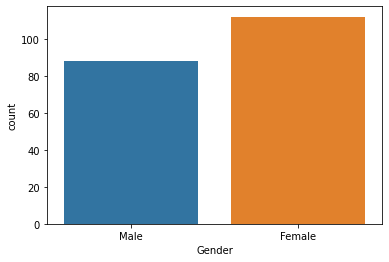

In [18]:
# 성별 분포도 확인 - countplot을 이용
sns.countplot(data=df, x='Gender');

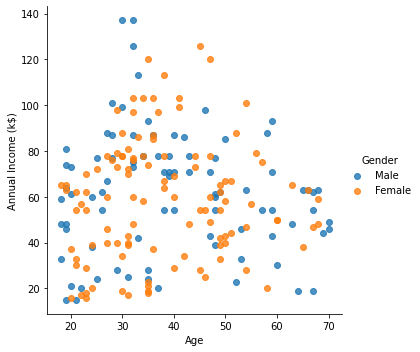

In [22]:
# 성별에 따른 년소득 분포도
sns.lmplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender', fit_reg=False);

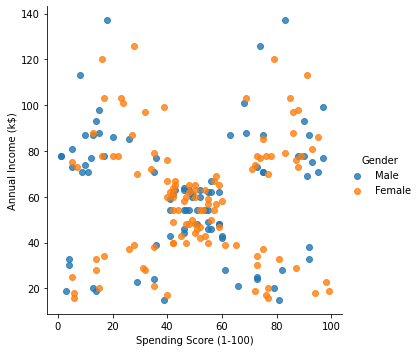

In [23]:
# 년소득에 따른 소비 분포도
sns.lmplot(data=df, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', fit_reg=False);

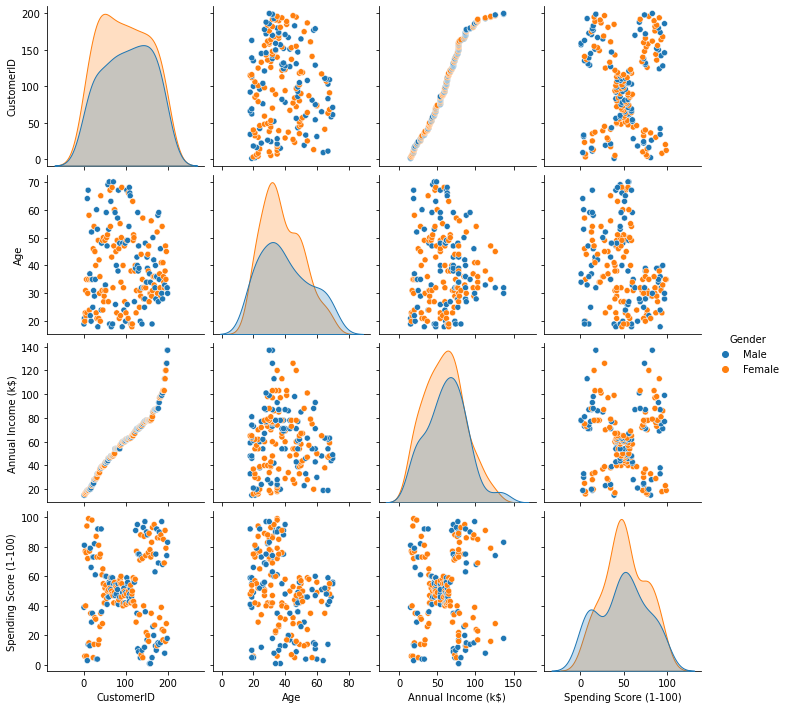

In [24]:
# pairplot으로 다시 확인
sns.pairplot(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']], hue='Gender');

<AxesSubplot:xlabel='Gender', ylabel='Age'>

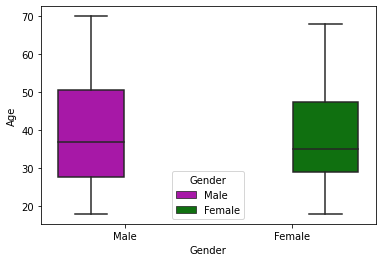

In [25]:
#박스 플롯으로 확인
sns.boxplot(x='Gender', y='Age', hue='Gender', palette=['m','g'], data=df)

### 고객 세그먼트 클러스터링

In [27]:
df[['Age', 'Spending Score (1-100)']]

Age  Spending Score (1-100)
0     19                      39
1     21                      81
2     20                       6
3     23                      77
4     31                      40
..   ...                     ...
195   35                      79
196   45                      28
197   32                      74
198   32                      18
199   30                      83

[200 rows x 2 columns]

In [28]:
from sklearn.cluster import KMeans

# X1에 'Age', 'Spending Score (1-100)'의 값을 넣어 줌
x1 = df[['Age', 'Spending Score (1-100)']].values

# 군집화를 위한 빈 리스트 생성
inertia = []

# 군집수 n을 1~11까지 돌아가며 x1에 대해 k-means 알고리즘을 적용하여 inertia를 리스트에 저장
for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)


In [29]:
inertia

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23819.442236543742,
 19498.412640311184,
 15523.684014328752,
 13006.48362885102,
 11520.34610781251,
 10160.705687830688]

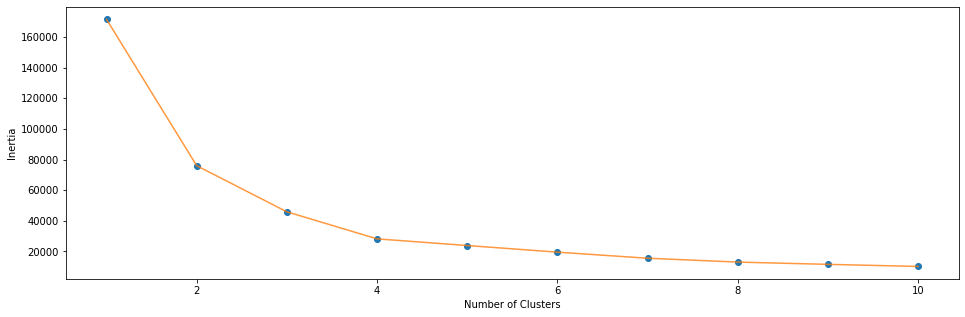

In [36]:
# inertia를 그래프로 확인
plt.figure(1, figsize=(16,5))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.8)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia');

In [37]:
# 군집수 4개로 시각화
algorithm = (KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300,
                   tol=0.0001, random_state=111, algorithm='elkan'))
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [54]:
# 시각화를 위한 배열/차원 세팅
h = 0.02
x_min, x_max = x1[:,0].min() -1, x1[:,0].max() +1 # 17, 70
y_min, y_max = x1[:,1].min() -1, x1[:,1].max() +1 # 1, 99

# .meshgrid() - 2/3차원 그리드
# .arange() - 배열로 반환 (최소, 최대, 간격)
# xx,yy = 2차원 등고선 함수를 그릴때 사용
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# .c_ = 여러행렬을 column으로 이어 붙이기 위해 사용
# 이어붙일 행렬들은 xx.ravel(), yy.ravel()
# .ravel() - 다차원 배열을 1차원 배열로 바꿔줌
# 즉 z는 xx,yy의 2차원 값을 1차원으로 바꿔서 예측
z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

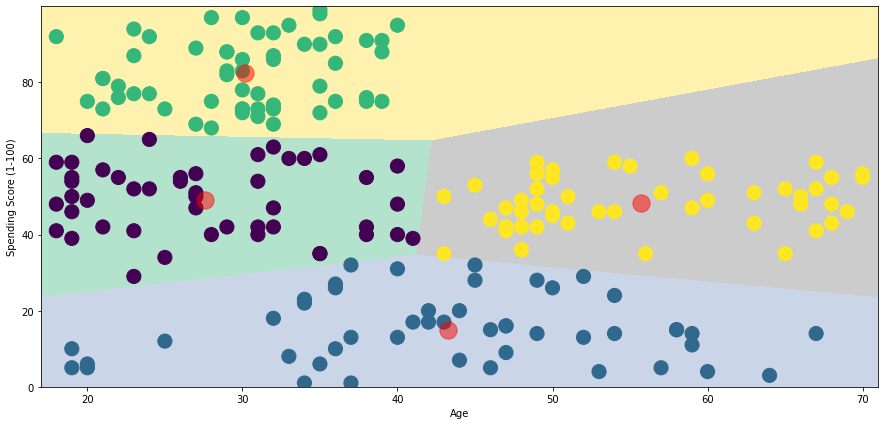

In [71]:
plt.figure(1, figsize=(15, 7))
plt.clf() # 위에서 만든 플롯을 지움

# .reshape 차원과 모양을 변경하여 행렬을 반환
z = z.reshape(xx.shape)
plt.imshow(z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                                              cmap = plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels1, s=200)
plt.scatter(x=centroids1[:, 0], y=centroids1[:,1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age');

In [79]:
# 년소득과 소비점수 클러스터링

# X2에 'Annual Income (k$)', 'Spending Score (1-100)'의 값을 넣어 줌
x2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# 군집화를 위한 빈 리스트 생성
inertia = []

# 군집수 n을 1~11까지 돌아가며 x1에 대해 k-means 알고리즘을 적용하여 inertia를 리스트에 저장
for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n))
    algorithm.fit(x2)
    inertia.append(algorithm.inertia_)


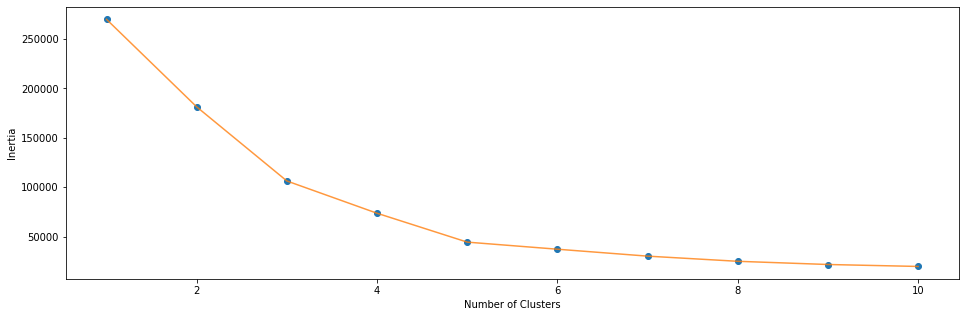

In [80]:
# inertia를 그래프로 확인
plt.figure(1, figsize=(16,5))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.8)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia');

In [84]:
# 군집수 5개로 시각화
algorithm = (KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300,
                   tol=0.0001, random_state=111, algorithm='elkan'))
algorithm.fit(x2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [85]:
# 시각화를 위한 배열/차원 세팅
h = 0.02
x_min, x_max = x2[:,0].min() -1, x2[:,0].max() +1 # 17, 70
y_min, y_max = x2[:,1].min() -1, x2[:,1].max() +1 # 1, 99

# .meshgrid() - 2/3차원 그리드
# .arange() - 배열로 반환 (최소, 최대, 간격)
# xx,yy = 2차원 등고선 함수를 그릴때 사용
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# .c_ = 여러행렬을 column으로 이어 붙이기 위해 사용
# 이어붙일 행렬들은 xx.ravel(), yy.ravel()
# .ravel() - 다차원 배열을 1차원 배열로 바꿔줌
# 즉 z는 xx,yy의 2차원 값을 1차원으로 바꿔서 예측
z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

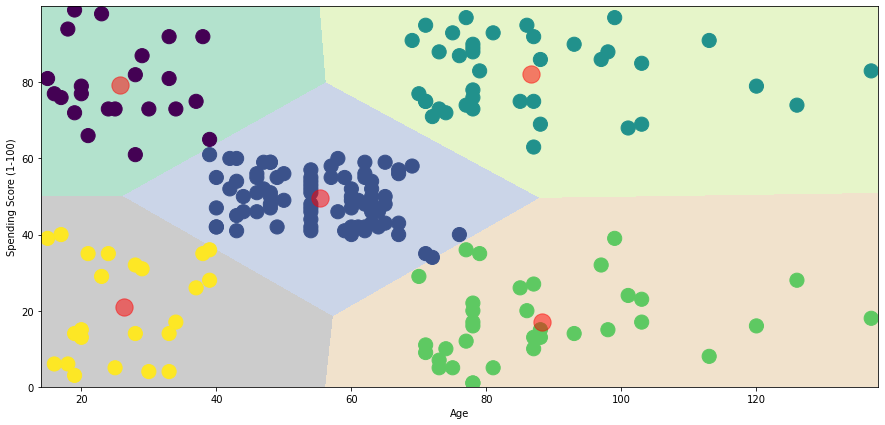

In [86]:
plt.figure(1, figsize=(15, 7))
plt.clf() # 위에서 만든 플롯을 지움

# .reshape 차원과 모양을 변경하여 행렬을 반환
z2 = z2.reshape(xx.shape)
plt.imshow(z2, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                                              cmap = plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels2, s=200)
plt.scatter(x=centroids2[:, 0], y=centroids2[:,1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age');

In [87]:
# K를 선택하는 또 다른 기준 - 실루엣

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 6 The average silhouette_score is : 0.4523443947724053


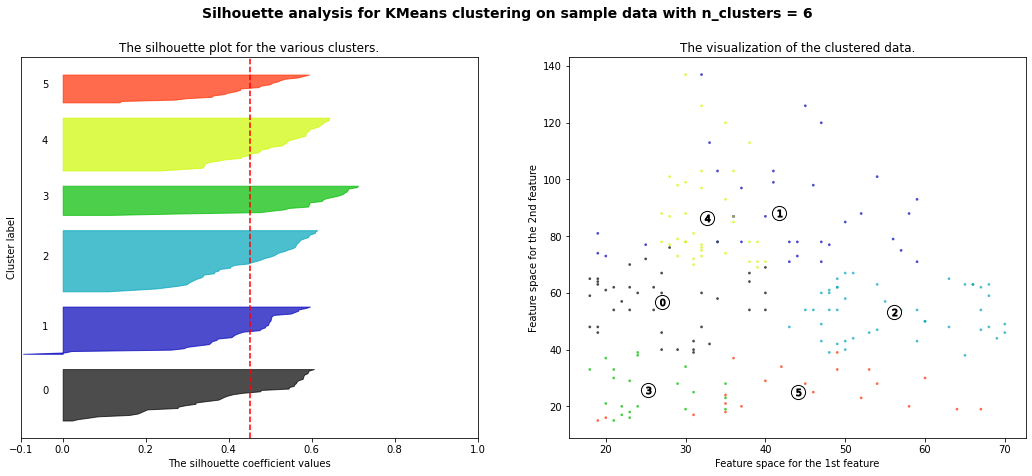

In [89]:
# 클러스터의 갯수 리스트를 만들어줍니다. 
range_n_clusters = [6]

# 사용할 컬럼 값을 지정해줍니다. 
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values


for n_clusters in range_n_clusters:
    # 1 X 2 의 서브플롯을 만듭니다. 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 첫 번째 서브플롯은 실루엣 플롯입니다. 
    # silhouette coefficient는 -1에서 1 사이의 값을 가집니다.
    # 시각화에서는 -1 값이 잘 나오지 않음
    # -0.1에서 1사이로 지정해줍니다. 
    ax1.set_xlim([-0.1, 1])

    # clusterer를 n_clusters 값으로 초기화 해줍니다.  
    # 재현성을 위해 random seed를 10으로 지정 합니다.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # silhouette_score는 모든 샘플에 대한 평균값을 제공합니다. 
    # 실루엣 스코어는 형성된 군집에 대해 밀도(density)와 분리(seperation)에 대해 견해를 제공합니다. 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 각 샘플에 대한 실루엣 스코어를 계산합니다. 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 클러스터 i에 속한 샘플들의 실루엣 스코어를 취합하여 정렬합니다. 
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 각 클러스터의 이름을 달아서 실루엣 플롯의 Label을 지정해줍니다. 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 플롯을 위한 새로운 y_lower를 계산합니다.
        y_lower = y_upper + 10  # 10 for the 0 samples






    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 모든 값에 대한 실루엣 스코어의 평균을 수직선으로 그려줍니다. 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # yaxis labels / ticks 를 지워줍니다. 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 두 번째 플롯이 실제 클러스터가 어떻게 형성되었는지 시각화 합니다. 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 클러스터의 이름을 지어줍니다. 
    centers = clusterer.cluster_centers_
    # 클러스터의 중앙에 하얀 동그라미를 그려줍니다. 
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [94]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [96]:
cluster_labels

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 2, 3, 2, 0,
       5, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 4, 0, 4, 1, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [97]:
# 기존 데이터 셋에 각 고객이 속한 클러스터 값을 넣은 후 특성 확인
df['cluster'] = cluster_labels
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     cluster  
0          5  
1          3  
2          5  
3          3  
4          5  
..       ...  
195        4  
196        1  
197        4  
198        1  
199        4  

[200 rows x 6 columns]

In [98]:
df.groupby('cluster')['Age'].mean()

cluster
0    27.000000
1    41.685714
2    56.155556
3    25.272727
4    32.692308
5    44.142857
Name: Age, dtype: float64

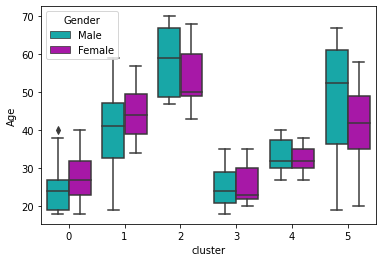

In [101]:
sns.boxplot(x='cluster',y='Age',hue='Gender',palette=['c','m'], data=df);

C:\devtools\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


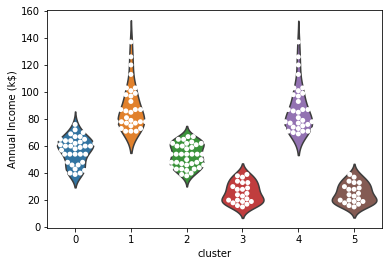

In [105]:
# 바이올린과 스웜플롯으로 구체적으로 시각화
ax = sns.violinplot(x='cluster', y='Annual Income (k$)', data=df, inner=None)
ax = sns.swarmplot(x='cluster', y='Annual Income (k$)', data=df, color='white', edgecolor='grey')

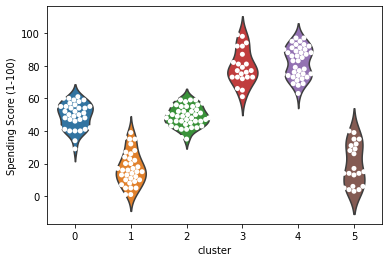

In [106]:
# 바이올린과 스웜플롯으로 구체적으로 시각화
ax = sns.violinplot(x='cluster', y='Spending Score (1-100)', data=df, inner=None)
ax = sns.swarmplot(x='cluster', y='Spending Score (1-100)', data=df, color='white', edgecolor='grey')

C:\devtools\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


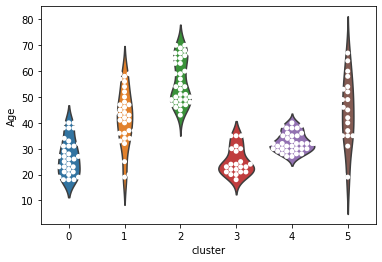

In [107]:
ax = sns.violinplot(x='cluster', y='Age', data=df, inner=None)
ax = sns.swarmplot(x='cluster', y='Age', data=df, color='white', edgecolor='grey')

In [110]:
# 3차원으로 시각화 해봅니다. 
import plotly.graph_objs as go
import plotly as py

df['label3'] =  cluster_labels
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 20
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

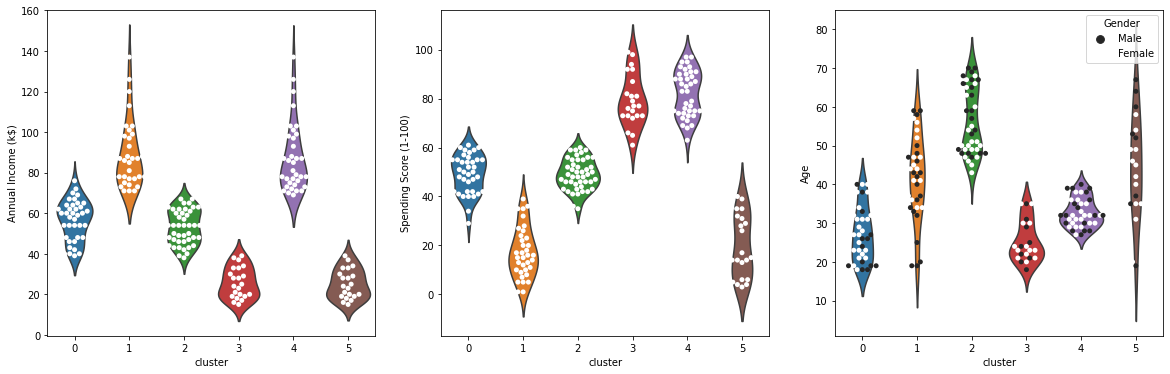

In [111]:
# 한번에 놓고 적용 방안 논의
# 3개의 시각화를 한 화면에 배치합니다. 
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3)

# 시각화의 사이즈를 설정해줍니다. 
figure.set_size_inches(20, 6)

# 클러스터별로 swarmplot을 시각화해봅니다. 
ax1 = sns.violinplot(x="cluster", y='Annual Income (k$)', data=df, inner=None, ax=ax1)
ax1 = sns.swarmplot(x="cluster", y='Annual Income (k$)', data=df,
                   color="white", edgecolor="gray", ax=ax1)

ax2 = sns.violinplot(x="cluster", y='Spending Score (1-100)', data=df, inner=None, ax=ax2)
ax2 = sns.swarmplot(x="cluster", y='Spending Score (1-100)', data=df,
                   color="white", edgecolor="gray", ax=ax2)

ax3 = sns.violinplot(x="cluster", y='Age', data=df, inner=None, ax=ax3)
ax3 = sns.swarmplot(x="cluster", y='Age', data=df,
                   color="white", edgecolor="gray", ax=ax3, hue="Gender")


In [46]:
x1[:]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [44]:
x1[:,1]

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

In [48]:
x1[:,1].max()

99

In [51]:
np.arange(x_min, x_max, h)

array([17.  , 17.02, 17.04, ..., 70.94, 70.96, 70.98])

In [64]:
labels1

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [67]:
centroids1

array([[27.61702128, 49.14893617],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667]])

In [68]:
centroids1[:1]

array([[27.61702128, 49.14893617]])

In [69]:
centroids1[:1,0]

array([27.61702128])